## ** Employee Attrition Prediction Model Using Logistic Regressiom**

Employee attrition prediction refers to the process of forecasting whether an employee is likely to leave the organization within a specific time frame. By using machine learning techniques like Logistic Regression, companies can identify employees who are at risk of leaving and take proactive steps to retain them. Logistic Regression is particularly well-suited for this task because it is a statistical model used for binary classification, which works well for predicting two outcomes — in this case, whether an employee will leave (1) or stay (0).

## **Step 1 : Import Libraries and Load Data**

* **pandas**: Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
* **numpy**: Provides support for numerical operations on large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
* **matplotlib.pyplot**: Used for creating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.
* **seaborn**: A data visualization library built on matplotlib, providing a high-level interface to create statistical graphics such as heatmaps, pair plots, and box plots.
* **sklearn.model_selection**:
    * **train_test_split**: Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.
    * **GridSearchCV**: Performs an exhaustive search over specified hyperparameter values, identifying the best-performing model.
    * **cross_val_score**: Evaluates model performance through cross-validation by splitting the data into multiple folds and computing average accuracy.
* **sklearn.preprocessing**:
  * **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, ensuring all features contribute equally to the model.
  * **OneHotEncoder**: Converts categorical variables into a binary matrix (dummy variables), enabling models to interpret non-numerical features.
* **sklearn.compose**:
  * **ColumnTransformer**: Applies different transformations to specific columns in the dataset, allowing a combination of encoding and scaling steps in a single pipeline.
* **sklearn.linear_model**:
  * **LinearRegression**: Builds a linear model by fitting a straight line to the data, predicting the target variable based on input features.
  * **Ridge**: A variation of linear regression that introduces L2 regularization, which reduces model complexity by penalizing large coefficients.
  * **Lasso**: Applies L1 regularization to linear regression, effectively performing feature selection by shrinking less important feature coefficients to zero.
* **sklearn.metrics**:
  * **mean_squared_error (MSE)**: Measures the average squared difference between actual and predicted values, penalizing large errors.
  * **mean_absolute_error (MAE)**: Computes the average absolute difference between actual and predicted values, giving equal weight to all errors.
  * **r2_score **: Indicates how well the model fits the data, representing the proportion of variance explained by the model.
* **sklearn.pipeline**:
  * **Pipeline**: Automates a sequence of data processing and model training steps, ensuring a streamlined workflow without repeated manual operations.

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [15]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings("ignore")

## Step 2 : Read The Data

In [17]:
df = pd.read_csv(r"C:\Users\91932\OneDrive\Desktop\employee_attrition_data.csv")

In [18]:
df

,Age,Gender,Years_at_Company,Job_Satisfaction,Salary,Attrition
0,50,Female,3,4,117697,No
1,36,Male,1,2,136239,No
2,29,Male,14,2,134397,No
3,42,Male,1,4,35355,No
4,40,Male,3,1,84120,No
...,...,...,...,...,...,...
995,34,Female,11,4,142429,No
996,51,Female,8,1,32591,No
997,44,Male,1,3,140431,No
998,40,Female,2,3,78516,No


In [19]:
print("Data shape:\n",df.shape)
print("Data sample:\n",df.describe)

Data shape:
 (1000, 6)
Data sample:
 <bound method NDFrame.describe of      Age  Gender  Years_at_Company  Job_Satisfaction  Salary Attrition
0     50  Female                 3                 4  117697        No
1     36    Male                 1                 2  136239        No
2     29    Male                14                 2  134397        No
3     42    Male                 1                 4   35355        No
4     40    Male                 3                 1   84120        No
..   ...     ...               ...               ...     ...       ...
995   34  Female                11                 4  142429        No
996   51  Female                 8                 1   32591        No
997   44    Male                 1                 3  140431        No
998   40  Female                 2                 3   78516        No
999   53  Female                11                 4  121683        No

[1000 rows x 6 columns]>


## **Step 3 : Exploratory Data Analysis**


In [22]:
df.isnull().sum()

Age                 0
Gender              0
Years_at_Company    0
Job_Satisfaction    0
Salary              0
Attrition           0
dtype: int64

In [27]:
df.describe()

,Age,Years_at_Company,Job_Satisfaction,Salary
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.947000,9.320000,2.487000,89405.901000
std,11.160858,5.778494,1.129206,34852.046783
min,22.000000,0.000000,1.000000,30112.000000
25%,31.000000,4.000000,1.000000,57785.250000
50%,42.000000,9.000000,3.000000,90135.000000
75%,50.000000,14.000000,3.000000,119388.500000
max,59.000000,19.000000,4.000000,149747.000000


<function matplotlib.pyplot.show(close=None, block=None)>

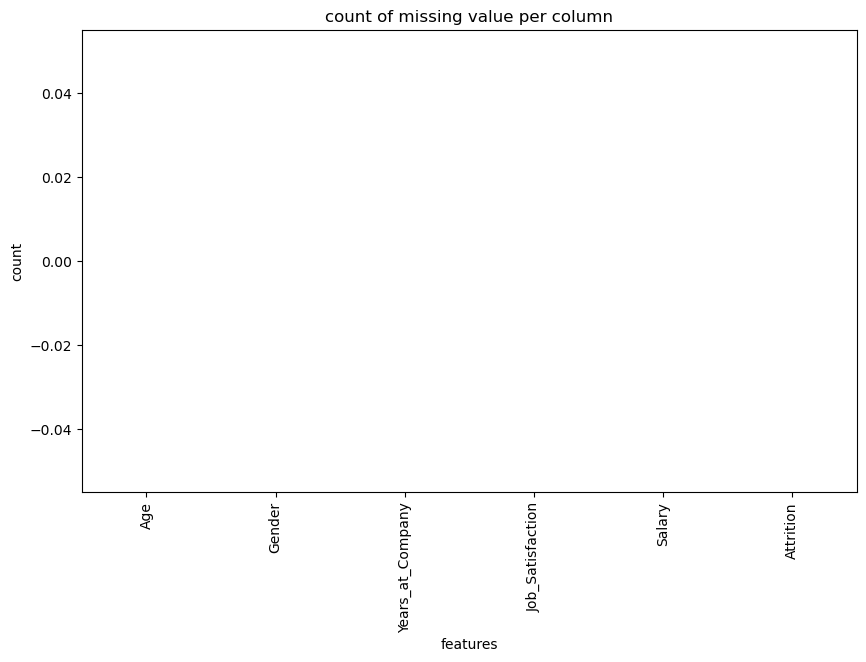

In [29]:
df.isnull().sum().plot(kind= 'bar', figsize = (10,6),color ='skyblue')
plt.title('count of missing value per column')
plt.ylabel('count')
plt.xlabel("features")
plt.show

Text(0.5, 1.0, 'Gender')

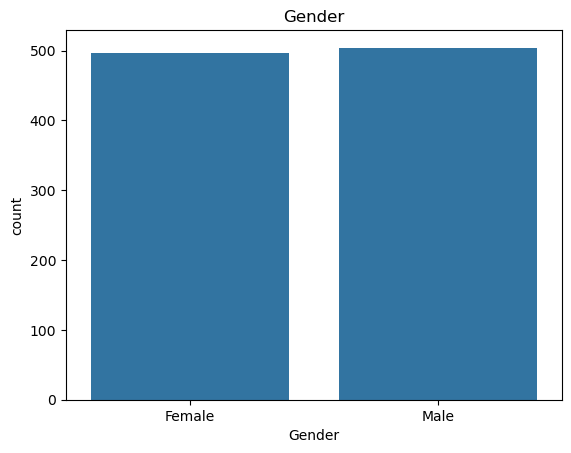

In [31]:
sns.countplot(data=df,x="Gender")
plt.title("Gender")

Text(0.5, 1.0, 'Years_at_Company')

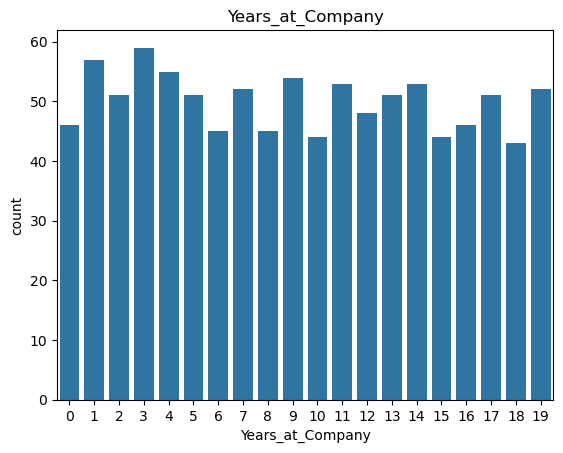

In [33]:
sns.countplot(data=df,x="Years_at_Company")
plt.title("Years_at_Company")

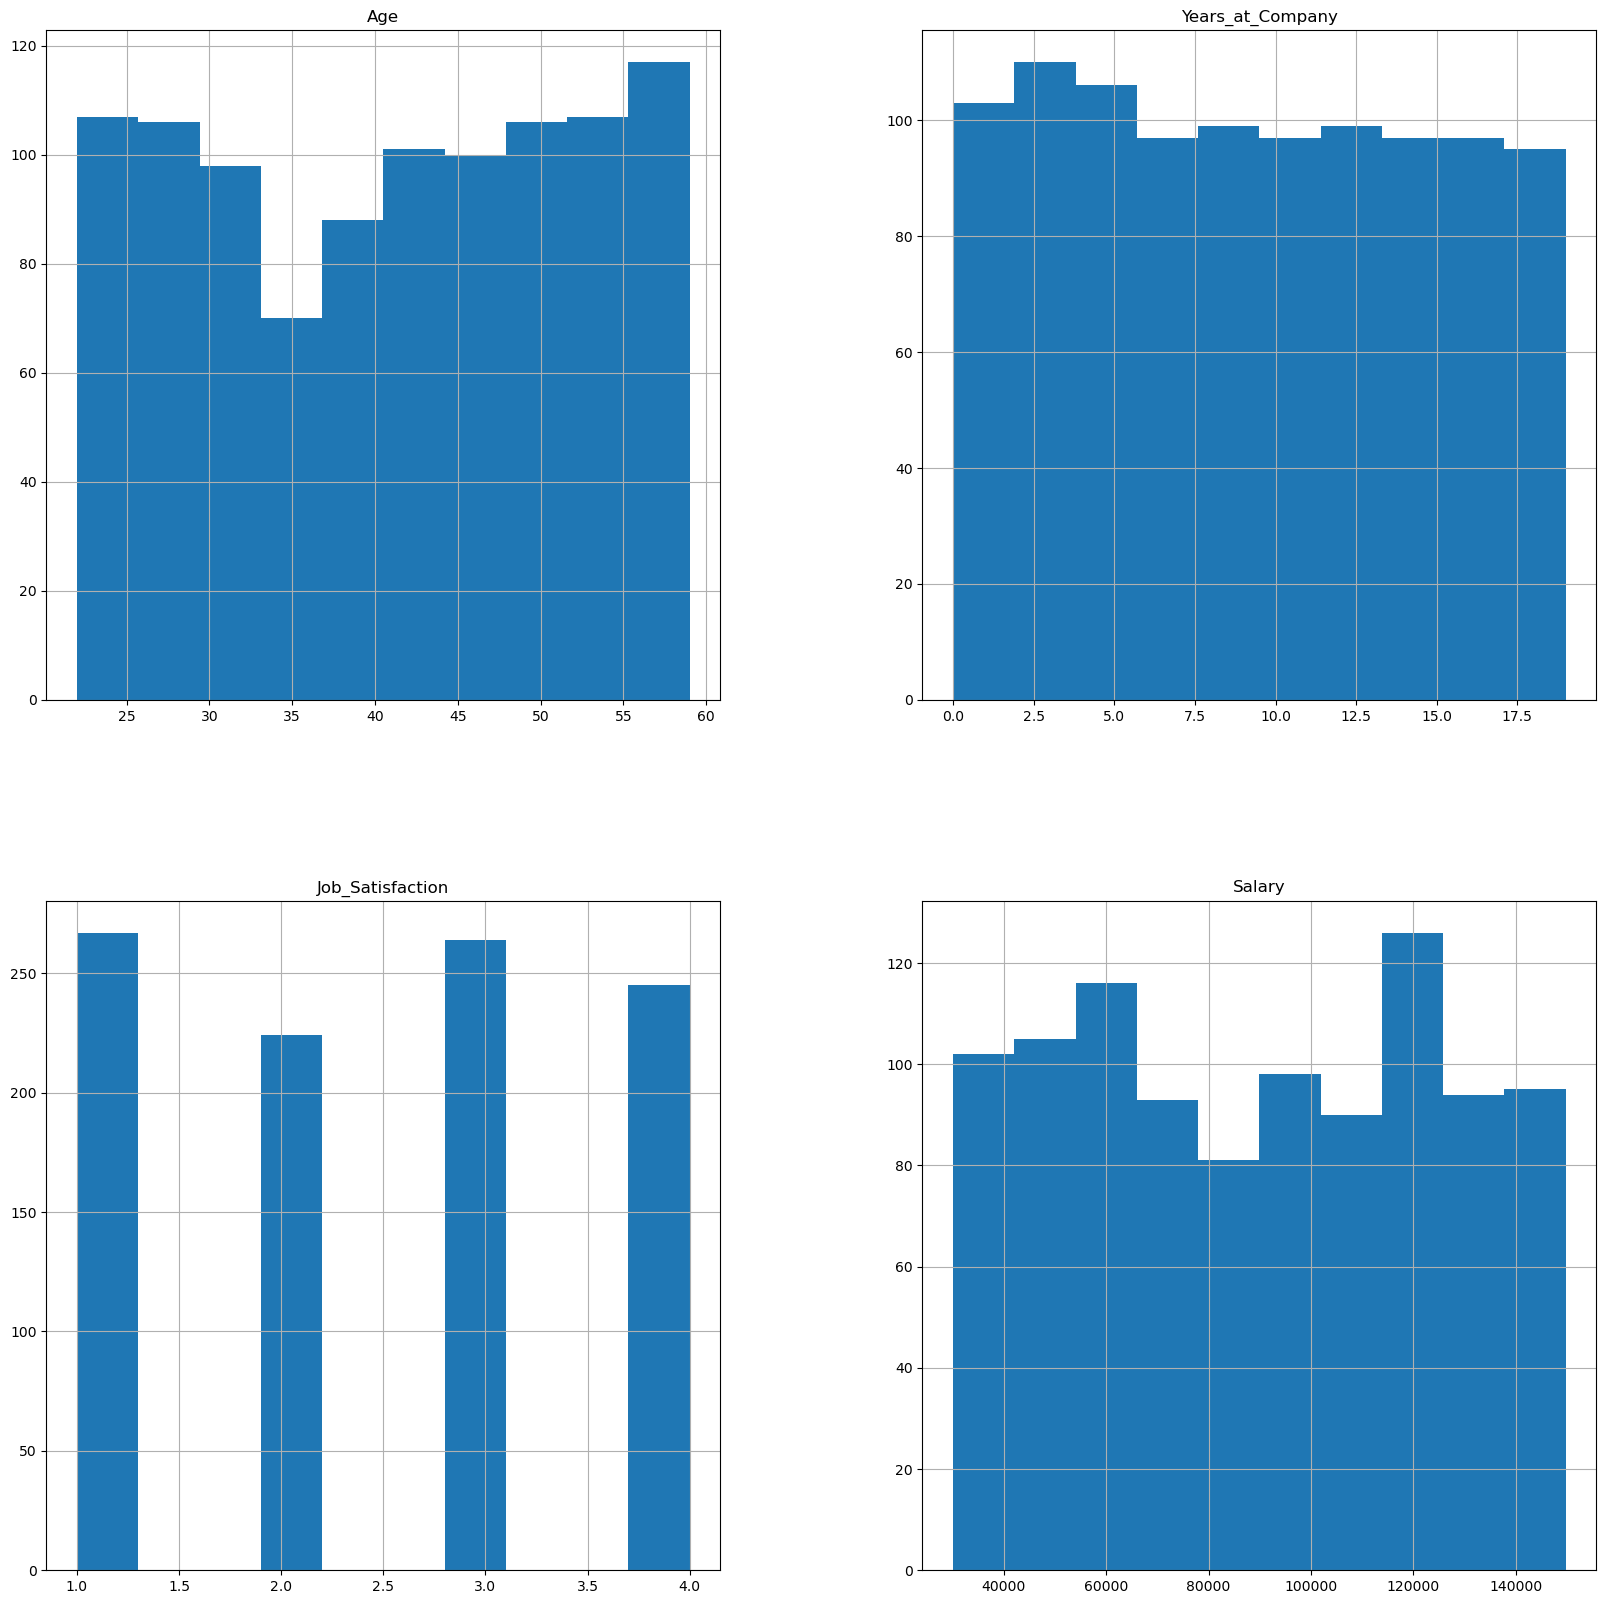

In [37]:
fig = df.hist(figsize=(20,20))

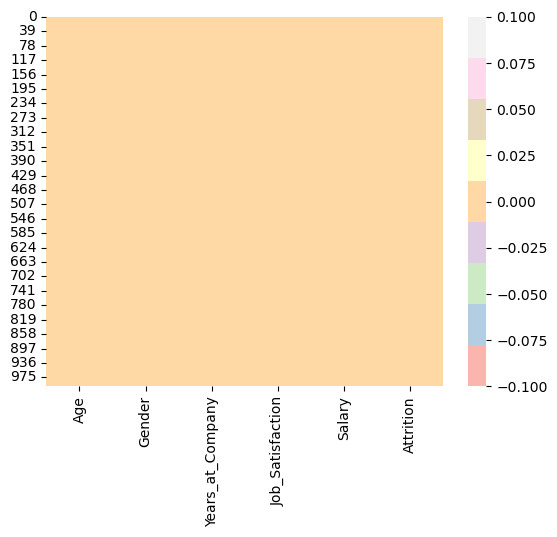

In [37]:
sns.heatmap(df.isnull(),cmap = 'Pastel1')
plt.show()

## Step 4 : Data PreProcessing 
**Identify numeric and categorical columns** **AND** **Define column transformer to scale and encode**

**Define features (X) and target (y)**

In [38]:
x = df[['Age']]
y = df['Attrition']

In [40]:
y

0      No
1      No
2      No
3      No
4      No
       ..
995    No
996    No
997    No
998    No
999    No
Name: Attrition, Length: 1000, dtype: object

In [41]:
x

,Age
0,50
1,36
2,29
3,42
4,40
...,...
995,34
996,51
997,44
998,40


## **Step 4: Model Building**
To train and evaluate an SVM model using various kernels (linear, sigmoid, and RBF) and compare their performance.

Common steps include:
- **Model Training**:
For each kernel type, an SVM model is trained on the scaled features (X_scaled) and labels (y).

- **Prediction**:
The trained model makes predictions on the same dataset (X_scaled).

- **Evaluation Metrics**:

 - **Accuracy**: The proportion of correctly classified instances.
 - **Confusion Matrix**: Breakdown of true and false predictions.
 - **Classification Report**: Provides precision, recall, and F1-score for each class.

**Split into training and testing sets**

* **train_test_split()** splits data into training (80%) and testing (20%) subsets.
* **random_state=42** ensures reproducibility by generating the same split each time.

In [46]:
x_train,x_test,y_train,y_test = train_test_split (x,y,train_size=0.2,random_state= 10)

In [48]:
x_train.shape

(200, 1)

**Training the model**

In [50]:
LOR = LogisticRegression() 

In [52]:
LOR

LogisticRegression()

In [54]:
LOR.fit(x_train,y_train)

LogisticRegression()

## **Model Evaluation**

In [56]:
y_pred = LOR.predict(x_test)

In [58]:
acc = accuracy_score(y_test,y_pred)
acc

0.80375

In [60]:
classification = (y_test,y_pred)
classification

(841     No
 956     No
 544     No
 173     No
 759     No
       ... 
 961    Yes
 213    Yes
 465     No
 206     No
 665     No
 Name: Attrition, Length: 800, dtype: object,
 array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
        

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.80      1.00      0.89       643
         Yes       0.00      0.00      0.00       157

    accuracy                           0.80       800
   macro avg       0.40      0.50      0.45       800
weighted avg       0.65      0.80      0.72       800

